# Transporte

## Enunciado
La Lechita Ramírez S.A. es una empresa que produce productos lácteos y cuenta con cuatro plantas de producción en Colombia cuyas capacidades de producción mensuales de leche son 1500, 1200, 1400, y 1000 litros, respectivamente. Estas cuatro plantas suministran leche a los ocho clientes que actualmente tienen, los cuales son distribuidores minoristas de productos. Las demandas mensuales de leche de estos distribuidores son 930, 600, 460, 610, 830, 460, 640 y 240 litros, respectivamente. La Tabla 1 presenta el costo en el que incurre la compañía al enviar un litro de leche desde cada planta hacia cada distribuidor. 

*Tabla 1:*

|            |**Dist. 1**|Dist. 2|Dist. 3|Dist. 4|Dist. 5|Dist. 6|Dist. 7|Dist. 8|
|:----------:|----------:|------:|------:|------:|------:|------:|------:|------:|
|**Planta 1**|650        |125    |1200   |340    |150    |260    |350    |800    |
|**Planta 2**|250        |200    |250    |600    |150    |950    |1050   |1000   |
|**Planta 3**|600        |350    |400    |260    |150    |300    |450    |600    |
|**Planta 4**|450        |800    |650    |250    |340    |700    |600    |620    |

<div style="text-align:justify">
Formule un modelo general de optimización lineal que le permita a La Lechita Ramírez satisfacer la demanda de sus clientes, al menor costo posible. Para esto usted debe seguir los siguientes pasos: 

## Formulación

**1.** Escriba lo(s) conjunto(s), parámetro(s) y variable(s) de decisión que utilizará en el modelo.  

### Conjuntos
- $P$: Plantas
- $D$: Distribuidores

### Parámetros
- $b_i$: oferta de leche de la planta $i\in P$
- $t_j$: demanda de leche del distribuidor $j\in D$ 
- $c_{ij}$: costo de envío de un litro de leche de la planta $i\in P$ al distribuidor $j\in D$

### Variables de decisión
- $x_{ij}$: cantidad (en litros) de leche que van de la planta $i\in P$ al distribuidor $j\in D$

### Restricciones
**2.** Escriba la(s) restricción(es) lineal(es) que describe(n) que se debe respetar la oferta de las plantas.   

\begin{align}
\sum_{j\in D}x_{ij} &\le b_i, &&\forall i\in P.
\end{align}

**3.** Escriba la(s) restricción(es) lineal(es) que describe(n) que se debe satisfacer la demanda de los distribuidores.  

\begin{align}
\sum_{i\in P}x_{ij} &\ge t_j, &&\forall j\in D.
\end{align}

**4.** Escriba la(s) restricción(es) que describe(n) matemáticamente el tipo de variable(s) que está utilizando dentro del modelo.   

\begin{align}
x_{ij} & \ge 0, &&\forall i\in P,j\in D.
\end{align}

### Función Objetivo
**5.** Escriba la función objetivo.

$$
\text{minimizar }  \sum_{i\in P}\sum_{j\in D}x_{ij}c_{ij}
$$

## Formulación matemática completa

**Conjuntos:**
- $P$: Plantas
- $D$: Distribuidores

**Parámetros:**
- $b_i$: oferta de leche de la planta $i\in P$
- $t_j$: demanda de leche del distribuidor $j\in D$ 
- $c_{ij}$: costo de envío de un litro de leche de la planta $i\in P$ al distribuidor $j\in D$

**Variables de decisión:**
- $x_{ij}$: cantidad (en litros) de leche que van de la planta $i\in P$ al distribuidor $j\in D$

**Modelo:**

$$
\text{minimizar }  \sum_{i\in P}\sum_{j\in D}x_{ij}c_{ij} \text{ (1)} 
$$

Sujeto a,
\begin{align*}
\sum_{j\in D}x_{ij} &\le b_i, &&\forall i\in P; &(2)\\
\sum_{i\in P}x_{ij} &\ge t_j, &&\forall j\in D; &(3)\\
x_{ij} & \ge 0, &&\forall i\in P,j\in D. &(4)
\end{align*}

La función objetivo (1) minimiza los costos totales. Las restricción (2) describe que se debe respetar la oferta de las plantas. La restricción (3) describe que se debe satisfacer la demanda de los distribuidores. La restricción (4) describe la naturaleza de la variable $x_{ij}$. 

## Implementación
**g.** Resuelva el modelo planteado utilizando la librería de PulP en Python. ¿Cuál es la solución
óptima del problema? 

In [1]:
#se importa la libreria de PulP
from pulp import *

#-----------------
# Conjuntos
#-----------------
#Plantas
P=["Planta 1",
   "Planta 2",
   "Planta 3",
   "Planta 4"]

#Distribuidores
D=["Distribuidor 1",
   "Distribuidor 2",
   "Distribuidor 3",
   "Distribuidor 4",
   "Distribuidor 5",
   "Distribuidor 6",
   "Distribuidor 7",
   "Distribuidor 8"]

# Conjunto con todas las duplas (planta, distribuidor)
P_x_D = [(planta, distribuidor) for planta in P for distribuidor in D] 

#-----------------
# Parámetros
#-----------------
b={#planta: oferta de la planta i
   "Planta 1":1500,
   "Planta 2":1200,
   "Planta 3":1400,
   "Planta 4":1000} 

t={#distribuidor: demanda del distribuidor j
   "Distribuidor 1":930,
   "Distribuidor 2":600,
   "Distribuidor 3":460,
   "Distribuidor 4":610,
   "Distribuidor 5":830,
   "Distribuidor 6":460,
   "Distribuidor 7":640,
   "Distribuidor 8":240} 

c={#(planta, distribuidor): costo de envio de un litro de leche desde la planta i al distribuidor j
   ("Planta 1","Distribuidor 1"):650,
   ("Planta 1","Distribuidor 2"):125,
   ("Planta 1","Distribuidor 3"):1200,
   ("Planta 1","Distribuidor 4"):340,
   ("Planta 1","Distribuidor 5"):150,
   ("Planta 1","Distribuidor 6"):260,
   ("Planta 1","Distribuidor 7"):350,
   ("Planta 1","Distribuidor 8"):800,
   ("Planta 2","Distribuidor 1"):250,
   ("Planta 2","Distribuidor 2"):200,
   ("Planta 2","Distribuidor 3"):250,
   ("Planta 2","Distribuidor 4"):600,
   ("Planta 2","Distribuidor 5"):150,
   ("Planta 2","Distribuidor 6"):950,
   ("Planta 2","Distribuidor 7"):1050,
   ("Planta 2","Distribuidor 8"):1000,
   ("Planta 3","Distribuidor 1"):600,
   ("Planta 3","Distribuidor 2"):350,
   ("Planta 3","Distribuidor 3"):400,
   ("Planta 3","Distribuidor 4"):260,
   ("Planta 3","Distribuidor 5"):150,
   ("Planta 3","Distribuidor 6"):300,
   ("Planta 3","Distribuidor 7"):450,
   ("Planta 3","Distribuidor 8"):600,
   ("Planta 4","Distribuidor 1"):450,
   ("Planta 4","Distribuidor 2"):800,
   ("Planta 4","Distribuidor 3"):650,
   ("Planta 4","Distribuidor 4"):250,
   ("Planta 4","Distribuidor 5"):340,
   ("Planta 4","Distribuidor 6"):700,
   ("Planta 4","Distribuidor 7"):600,
   ("Planta 4","Distribuidor 8"):620} 

#-------------------------------------
# Creación del objeto problema en PuLP
#-------------------------------------
#Crea el problema para cargarlo con la instancia 
problema=LpProblem("Transporte",LpMinimize)

#-----------------------------
# Variables de Decisión
#-----------------------------
x=LpVariable.dicts('x',P_x_D,lowBound=0,cat='Continuous') #litros de leche que van de la planta i al distribuidor j; aca se añade de una vez la naturaleza de las variables

#-----------------------------
# Función objetivo
#-----------------------------
#Crea la expresión de minimizacion de costos
problema+=lpSum(x[i,j]*c[i,j] for i in P for j in D), "Costos Totales"

#-----------------------------
# Restricciones
#-----------------------------
#sum(j in D)x_ij <= b_i forall i in P
for i in P:
    problema+= lpSum(x[i,j] for j in D) <= b[i], "Oferta de la planta "+i   #se respeta la oferta de cada planta 

#sum(i in P)x_ij >= t_j forall j in D
for j in D:
    problema+= lpSum(x[i,j] for i in P) >= t[j], "Demanda del distribuidor "+j #se satisface la demanda de cada distribuidor 
    
#-----------------------------
# Imprimir formato LP
#-----------------------------
#Escribe el problema en un archivo con formato LP 
problema.writeLP("Transporte.lp")

#-----------------------------
# Invocar el optimizador
#-----------------------------
#Optimizar el modelo con CBC (default de PuLP)
problema.solve()

#-----------------------------
#    Imprimir resultados
#-----------------------------
#Imprimir estado final del optimizador
print("Estado (optimizador):", LpStatus[problema.status],end='\n')

#Valor óptimo del portafolio de Petroco    
print("\nTransporte - Costos totales = $", round(value(problema.objective),2))
print()


Using license file C:\Users\57350.000\gurobi.lic


Academic license - for non-commercial use only


No parameters matching '_test' found


Estado (optimizador): Optimal

Transporte - Costos totales = $ 1224800.0



## Visualización de resultados

In [2]:
#Coordenadas de las plantas
coordenadasPlantas={#planta: (x, y)
   "Planta 1":(9,12),
   "Planta 2":(7,6),
   "Planta 3":(5,14),
   "Planta 4":(2.5,10.5)}

#Coordenadas de los distribuidores
coordenadasDistribuidores={#distribuidor: (x, y)
                           "Distribuidor 1":(5.5,9),
                           "Distribuidor 2":(8,10),
                           "Distribuidor 3":(5,8),
                           "Distribuidor 4":(6,10),
                           "Distribuidor 5":(7,10),
                           "Distribuidor 6":(7.5,15),
                           "Distribuidor 7":(7,17),
                           "Distribuidor 8":(1,15)}
#Se guarda la solución en un vector
xSol={(i,j):x[i,j].value() for i in P for j in D}



In [3]:
#se importa la libreria que utilizará para la visualización
import matplotlib.pyplot as plt

#función para pintar las plantas
def pintarPlantas(pPlantas,pAx):
    xP=[i for (i,j) in pPlantas.values()]
    yP=[j for (i,j) in pPlantas.values()]
    pAx.scatter(xP,yP,c='green',marker='s',s=200,zorder=2)
    return pAx

#función para pintar los distribuidores
def pintarDistribuidores(pDistribuidores,pAx):
    xD=[i for (i,j) in pDistribuidores.values()]
    yD=[j for (i,j) in pDistribuidores.values()]
    pAx.scatter(xD,yD,c='red',s=100,zorder=2)
    return pAx

#función para pintar la solución
def pintarSolución(pSolucion,pPlantas,pDistribuidores,pAx):
    for (i,j),val in pSolucion.items():
        if val>0:
            pAx.plot([pPlantas[i][0],pDistribuidores[j][0]],[pPlantas[i][1],pDistribuidores[j][1]],c='orange',zorder=1,label=val)
    return pAx

#función para pintar los numeros de cada planta
def pintarNumPlantas(pPlantas,pAx):
    for i,pos in pPlantas.items():
        pAx.text(pos[0]-0.08,pos[1]-0.12,i[-1],fontsize=12,color='white')
    return ax

#función para pintar los numeros de cada distribuidor
def pintarNumDistribuidores(pDistribuidores,pAx):
    for i,pos in pDistribuidores.items():
        pAx.text(pos[0]-0.06,pos[1]-0.12,i[-1],fontsize=8,color='black')
    return pAx

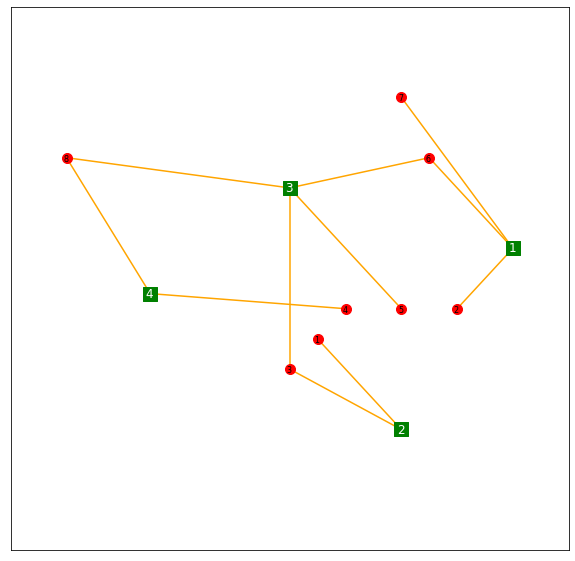

In [4]:
fig, ax = plt.subplots(figsize=(10,10))

#se definen la dimensión de los ejes y se borran los labels de los ejes
ax.set_xlim([0,10])
ax.set_ylim([2,20])
ax.set_xticks([])
ax.set_yticks([])

ax=pintarSolución(xSol,coordenadasPlantas,coordenadasDistribuidores,ax)
ax=pintarDistribuidores(coordenadasDistribuidores,ax)
ax=pintarNumDistribuidores(coordenadasDistribuidores,ax)
ax=pintarPlantas(coordenadasPlantas,ax)
ax=pintarNumPlantas(coordenadasPlantas,ax)

## Créditos

Desarrollo: Juan Felipe Rengifo M<br>
Fecha: 20/09/2020